In [1]:
import pandas as pd
import numpy as np
import os

import sys
sys.path.insert(1, '../../scripts')

In [2]:
base_dir_1m = '../../data/ml-1m'
ratings = pd.read_csv(os.path.join(base_dir_1m, 'ratings.dat'), sep='::', names=['UserID', "MovieID", "Rating", "TimeStamp"])
users = pd.read_csv(os.path.join(base_dir_1m, 'users.dat'), sep="::", names=["UserID","Gender","Age","Occupation","Zipcode"])
movies = pd.read_csv(os.path.join(base_dir_1m, 'movies.dat'), sep="::", names=["MovieID", "Title", "Genres"])

d:\WorkDocuments\pythonTensorflowEnv\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
d:\WorkDocuments\pythonTensorflowEnv\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
d:\WorkDocuments\pythonTensorflowEnv\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid th

In [3]:
print(ratings.head(5))
print(users.head(5))
print(movies.head(5))

   UserID  MovieID  Rating  TimeStamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291
   UserID Gender  Age  Occupation Zipcode
0       1      F    1          10   48067
1       2      M   56          16   70072
2       3      M   25          15   55117
3       4      M   45           7   02460
4       5      M   25          20   55455
   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy


In [27]:
#indexing
users.iloc[0:3, 0:3] #1st - 3rd row, 1st - 3rd column
users.iloc[0] #1st row
users.iloc[:, 0] #1st column


0          1
1          2
2          3
3          4
4          5
        ... 
6035    6036
6036    6037
6037    6038
6038    6039
6039    6040
Name: UserID, Length: 6040, dtype: int64

In [8]:
import dataCleaning
print("missing values:")
print(dataCleaning.missingValues(ratings))

print("rows with missing values:")
print(dataCleaning.getRowsWithMissingValues(movies))

missing values:
{'UserID': 0.0, 'MovieID': 0.0, 'Rating': 0.0, 'TimeStamp': 0.0, 'total': 0.0}
rows with missing values:
Empty DataFrame
Columns: [MovieID, Title, Genres]
Index: []


In [17]:
rating_by_user = ratings[['UserID', 'Rating']].groupby(['UserID']).agg(['mean', 'count'])


Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            6031, 6032, 6033, 6034, 6035, 6036, 6037, 6038, 6039, 6040],
           dtype='int64', name='UserID', length=6040)

(array([  2.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   2.,   3.,   5.,
          5.,   8.,  10.,  19.,  25.,  34.,  63.,  69., 109., 149., 188.,
        212., 358., 402., 479., 560., 585., 569., 565., 472., 413., 276.,
        197., 127.,  75.,  29.,  20.,   5.,   4.]),
 array([1.01538462, 1.11407407, 1.21276353, 1.31145299, 1.41014245,
        1.50883191, 1.60752137, 1.70621083, 1.80490028, 1.90358974,
        2.0022792 , 2.10096866, 2.19965812, 2.29834758, 2.39703704,
        2.4957265 , 2.59441595, 2.69310541, 2.79179487, 2.89048433,
        2.98917379, 3.08786325, 3.18655271, 3.28524217, 3.38393162,
        3.48262108, 3.58131054, 3.68      , 3.77868946, 3.87737892,
        3.97606838, 4.07475783, 4.17344729, 4.27213675, 4.37082621,
        4.46951567, 4.56820513, 4.66689459, 4.76558405, 4.8642735 ,
        4.96296296]),
 <BarContainer object of 40 artists>)

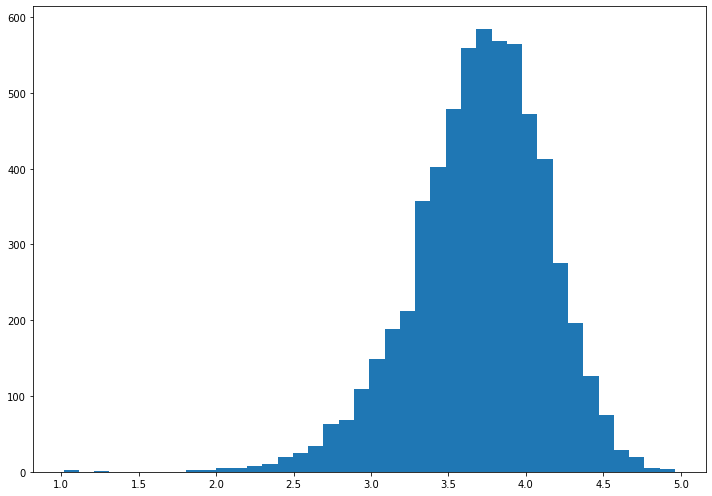

In [10]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
axs.hist(mean_rating[('Rating', 'mean')], bins = 40)

(array([ 56174.,      0., 107557.,      0.,      0., 261197.,      0.,
        348971.,      0., 226310.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

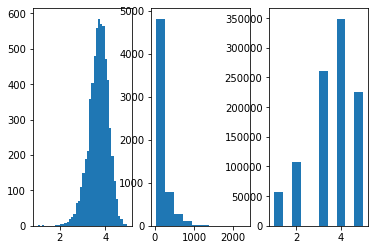

In [13]:
import matplotlib.pyplot as plt
# fig, axs = plt.subplots(1, 1,
#                         figsize =(10, 7),
#                         tight_layout = True)
fig, axs = plt.subplots(1, 3)
 
axs[0].hist(mean_rating[('Rating', 'mean')], bins = 40)
axs[1].hist(mean_rating[('Rating', 'count')], bins = 10)
axs[2].hist(ratings[['Rating']], bins=10)